In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr 10 15:09:21 2021

@author: pmarc
Résolution Problème L09 - #2 par Pierre-Marc Juneau, 14 avril 2021

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as stm
import statsmodels.stats.weightstats as ws
import math


In [3]:

donnee = pd.read_csv('../Fichiers/DonneesMarketingv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


In [8]:

"Pré-traitement"

donnee=donnee.dropna()

Q1 = donnee["Revenus"].quantile(0.25)
Q3 = donnee["Revenus"].quantile(0.75)
IQR = Q3 - Q1
donnee = donnee[(donnee["Revenus"] > (Q1 - 1.5 * IQR)) & (donnee["Revenus"] < (Q3 + 1.5 * IQR))]

## 2 grupos de perfil de compra (compra >50, compra <=50)
AchatsHautJoa=donnee[(donnee["Joaillerie ($/2sem)"] >= 50)]["Revenus"]
AchatsBasJoa=donnee[(donnee["Joaillerie ($/2sem)"] < 50)]["Revenus"]


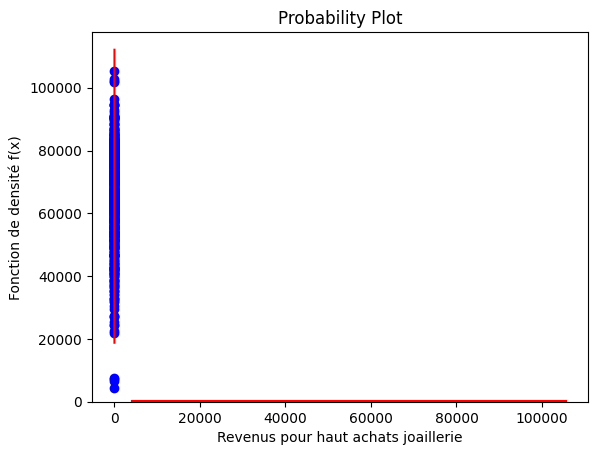

In [9]:

"Question 1"

sts.probplot(AchatsHautJoa.values, dist=sts.norm, plot=plt.figure().add_subplot(111))
d=1000
grille_x = np.linspace(AchatsHautJoa.min(), AchatsHautJoa.max(), d)
dx=(AchatsHautJoa.max()-(AchatsHautJoa.min()))/(d-1)
muHJ, sigmaHJ = sts.norm.fit(AchatsHautJoa.values)
pdf = sts.norm.pdf(grille_x, muHJ, sigmaHJ)
ax=AchatsHautJoa.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Revenus pour haut achats joaillerie")
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")
Fit_normalHJ = sts.kstest(AchatsHautJoa,'norm',[muHJ, sigmaHJ])


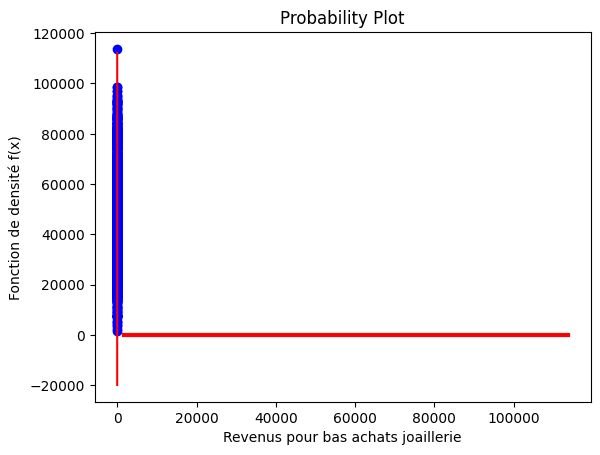

In [10]:


sts.probplot(AchatsBasJoa.values, dist=sts.norm, plot=plt.figure().add_subplot(111))
d=1000
grille_x = np.linspace(AchatsBasJoa.min(), AchatsBasJoa.max(), d)
dx=(AchatsBasJoa.max()-(AchatsBasJoa.min()))/(d-1)
muBJ, sigmaBJ = sts.norm.fit(AchatsBasJoa.values)
pdf = sts.norm.pdf(grille_x, muBJ, sigmaBJ)
ax=AchatsBasJoa.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Revenus pour bas achats joaillerie")
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")
Fit_normalBJ = sts.kstest(AchatsBasJoa,'norm',[muBJ, sigmaBJ])


Ttest_1sampResult(statistic=-1.704649589579257, pvalue=0.08875756582253716)


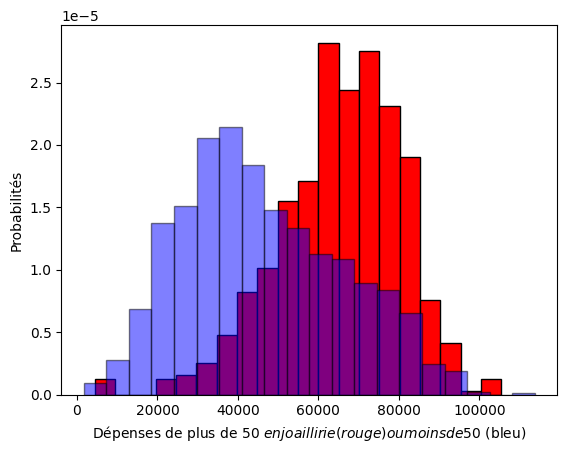

In [15]:


"Question 2"

ax=AchatsHautJoa.plot.hist(density=True, bins = 20, color = 'red', edgecolor = 'black')
ax=AchatsBasJoa.plot.hist(density=True, bins = 20, color = 'blue', edgecolor = 'black', alpha=0.5)
ax.set_xlabel("Dépenses de plus de 50 $ en joaillirie (rouge) ou moins de 50 $ (bleu)")
ax.set_ylabel("Probabilités")

stats_HautJ=AchatsHautJoa.describe()
n_HautJ=AchatsHautJoa.shape[0]
X_barre_HautJ=AchatsHautJoa.mean()
s_HautJ=AchatsHautJoa.std()

stats_BasJ=AchatsBasJoa.describe()
n_BasJ=AchatsBasJoa.shape[0]
X_barre_BasJ=AchatsBasJoa.mean()
s_BasJ=AchatsBasJoa.std()

mhu0BJ=100000
t0=(X_barre_HautJ-mhu0BJ)/(s_HautJ/(math.sqrt(n_HautJ)))
CV = sts.t.isf(0.05/2,n_HautJ-1)
p_value_calc=sts.t.sf(abs(t0),df=(n_HautJ-1))*2
pvalue=sts.ttest_1samp(AchatsHautJoa,mhu0BJ)

mhu0BJ=66500
t0=(X_barre_HautJ-mhu0BJ)/(s_HautJ/(math.sqrt(n_HautJ)))
CV = sts.t.isf(0.05/2,n_HautJ-1)
p_value_calc=sts.t.sf(abs(t0),df=(n_HautJ-1))*2
pvalue=sts.ttest_1samp(AchatsHautJoa,mhu0BJ)

print(pvalue)
## pvalue=0.08875756582253716 pvalue > 0.05: aceita-se a hipótese nula

In [16]:

## variância desconhecida nos 2 grupos e desconhecida ENTRE os grupos

"Question 3"

v=(s_HautJ**2/n_HautJ+s_BasJ**2/n_BasJ)**2/((s_HautJ**2/n_HautJ)**2/(n_HautJ+1)+(s_BasJ**2/n_BasJ)**2/(n_BasJ+1))-2
t0=(X_barre_HautJ-X_barre_BasJ)/math.sqrt(s_HautJ**2/n_HautJ+s_BasJ**2/n_BasJ)
CV = sts.t.isf(0.05/2,v)
p_value_calc=sts.t.sf(abs(t0),df=(v))*2

pvalue = sts.ttest_ind(AchatsHautJoa,AchatsBasJoa)
print(pvalue)
### o value < 0.05 ---> rejeita-se hipótese nula
### a média de renda é significativa entre os grupos



Ttest_indResult(statistic=21.69074981732277, pvalue=9.975057537743218e-95)
